# 认识数据

本文基于《Python数据科学与机器学习：从入门到实践》一书编写，主要参考“第2章 统计与概率复习以及Python实现”，对其中的知识点进行萃取并加入自己的见解。

数据有哪几种类型？

我们如何认识数据？

就像我们用姓名、性别、籍贯、身高、学历去认识（了解）一个人，我们又该怎样去认识数据？

## 数据类型

本文将数据分为3种类型：

- 数值型数据
- 分类数据
- 定序数据

**数值型数据**，可进一步分为离散型和连续型。离散型数据一般基于整数，如物品的数量，在一定的范围内可以穷举；连续型数据在有限的范围内可以有无数个取值，如长度。

发散思考：

如果对一种连续型数据要求了精度，是否就成了离散型数据？如身高数据如果不限精度，可以有无限个取值，但是限定精确到小数点后2位（假设以米为单位），在一定范围内就是可以穷举的。

离散型数据不一定是整数吧。

**分类数据**，如性别、种族，没有一般的数值意义。

**定序数据**，类似于数值类型和分类数据的混合体，最常见的定序数据是对电影的星级打分，如几颗星；或学生的成绩，如A、B、C等。定序数据有某种数学意义，也可以看作离散型数值数据。

## 均值、中位数和众数

不同的数据类型需要从不同的角度认识。

均值可用于描述数值类型的数据，不能用于描述分类数据。用于描述定序数据则有点勉强，比如一个人的2门课程是A，一门课程是B，平均成绩是多少？但如果考虑细节，总可以设计出一套方案，一般会将定序数据转为数值型数据，再求均值。

中位数和均值相似，可用于描述数值类型数据，不可用于描述分类数据。用于描述定序数据有点勉强，因为当数据点是偶数个的时候，需要通过求均值来计算中位数，所以它的勉强跟均值的勉强是一致的。

**均值受离群点的影响比较大**，加入少数几个离群点，可能会导致均值发生巨大变化（比如：平均工资极易受到极个别超高收入的影响），从而导致我们对数据的共性产生误解；**中位数受离群点的影响较小**，因为中位数的计算注意参考了数据点的位置，而不是数据点的值。

众数只对离散型数据有意义，不适合连续型数据。

下面介绍如何使用Python计算这些统计量：

计算均值

In [3]:
import numpy as np

# normal用于生成一组符合正态分布的数据，3个参数分别表示 数据的均值、标准差、数据的个数
incomes = np.random.normal(27000, 15000, 10000)

# mean用于计算数据的均值
np.mean(incomes)

26891.35556222135

**使用可视化手段展现数据**

可视化手段可以帮助我们对数据有更全面的认知，它包含的信息量多、表现形式直观，而且可以使用不同的图表从不同的角度描绘数据。

如，上文我们生成的数据，可以使用matplotlib生成直方图来了解数据的分布情况：

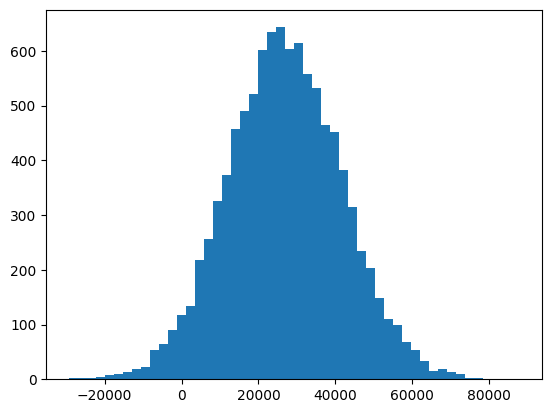

In [6]:
import matplotlib.pyplot as plt

# hist方法用于绘制直方图，参数分别表示：数据、分组个数
plt.hist(incomes, 50)

# show方法将图形展示出来
plt.show()

计算中位数

In [7]:
np.median(incomes)

26705.61734754747

分析离群点的作用

我们可以加入一个离群点，看看它的均值、中位数的影响情况

In [8]:
incomes = np.append(incomes, [1000000000])
np.mean(incomes), np.median(incomes)

(126878.66769545179, 26707.372981413042)

计算众数

计算众数需要用到SciPy包。

In [9]:
# 我们生成一份模拟数据
ages = np.random.randint(18, high=90, size=50)
ages

array([20, 30, 78, 80, 60, 33, 35, 62, 83, 81, 25, 51, 67, 79, 64, 53, 69,
       21, 82, 24, 26, 27, 87, 36, 60, 65, 77, 37, 24, 88, 57, 48, 77, 79,
       29, 60, 36, 42, 62, 24, 44, 81, 34, 83, 86, 89, 81, 36, 20, 20])

In [12]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=20, count=3)